#### Analysis of suicides in India from 2001-2012 on the basis of causes, means and status of the victims.

###### Distribution of suicides according to Educational status and Gender

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Suicides-in-India-2001-2012.csv')
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

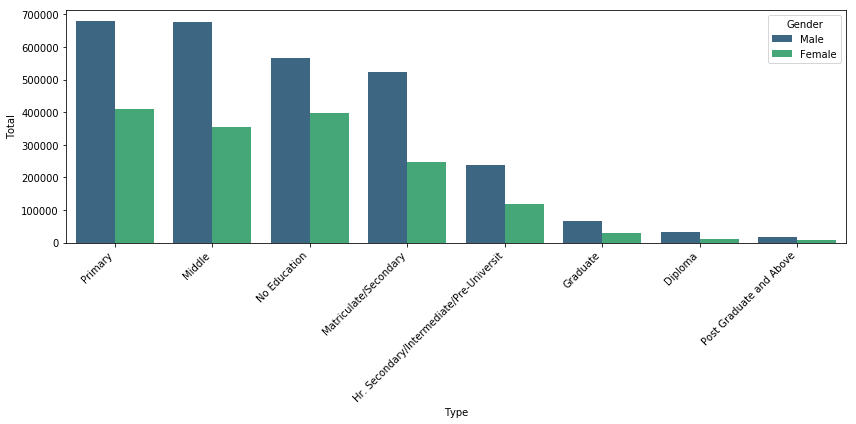

In [6]:
plt.figure(figsize=(12,6))
eduDf = eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

#### Number of suicides appear to be concentrated towards Lower education level. Most of the people who have committed suicides have education level below Matriculate/Secondary.

## Distribution of number of suicides on the basis of social status

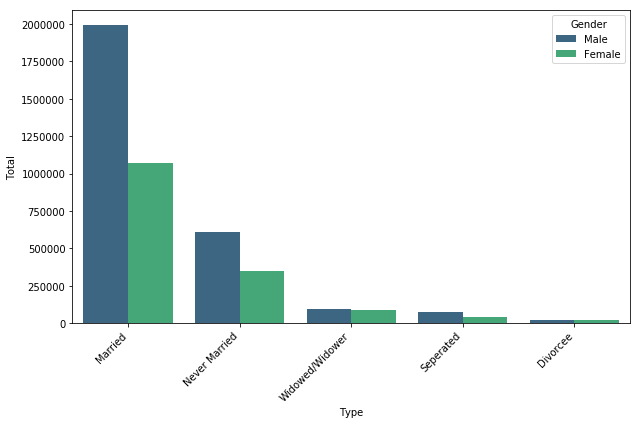

In [7]:
plt.figure(figsize=(9,6))
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

## Distribution of number of suicided on the basis of Cause

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


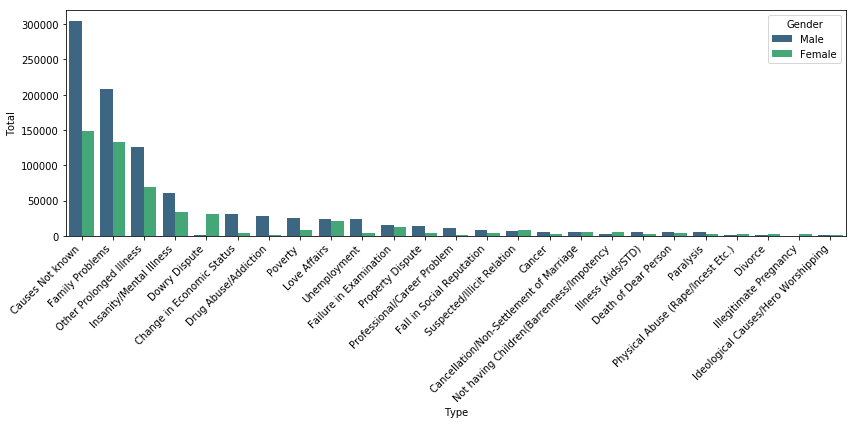

In [8]:
causesDf.is_copy = False
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(12,6))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

### While most of the causes of the suicides are not known, the three major causes among the known cases are Family problems, Prolonged illness and mental illness.

##### According to the data men seem to be badly effected by unemployment, property dispute, poverty,drug abuse or addiction and change in economic status than women.

##### Number of women who have committed suicides due to dowry disputes is much higher when compared to men,plt.figure(figsize=(12,6))


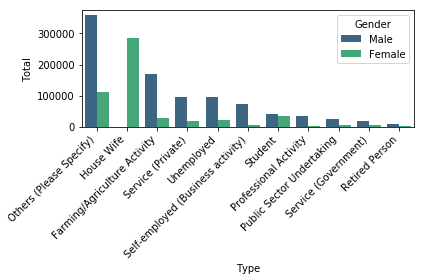

In [9]:
profDf = profDf[['Type','Gender','Total']]
profSort = profDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=profSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

##### According to the data, most of the females who have committed suicides are house wives. The percentage of female suicides in all other categories is much lower than the percentage of male suicides. While this is an indication of lower representation by women in professional careers, it also reiterates the importance of girl education and women empowerment. The graph shows that financially independent women are much mentally stronger.
##### It is disheartening to see that farmers who feed the rest of the country are the ones who are more committing suicides than any other profession. Followed by farmers, it's the unemployed and private sector employees who are most effected. It's surprising to know that the number of suicides among the unemployed and the private sector employees is almost the same. This also might be due to higher pressure in private sector when compared to government sector jobs.

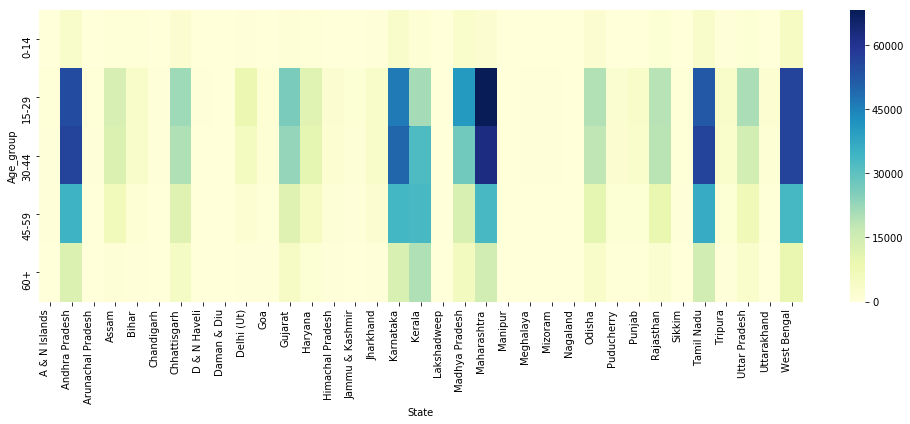

In [10]:
causes = df[df['Type_code']=='Causes']
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.tight_layout()

#### This plot gives us an insight on the number of suicides, based on state and age group. As we can see 15-29 is the most vulnerable age in all states except Kerala. Maharashtra is the state with most number of suicides.Number of suicides per square kilometre might give us some more information on this.

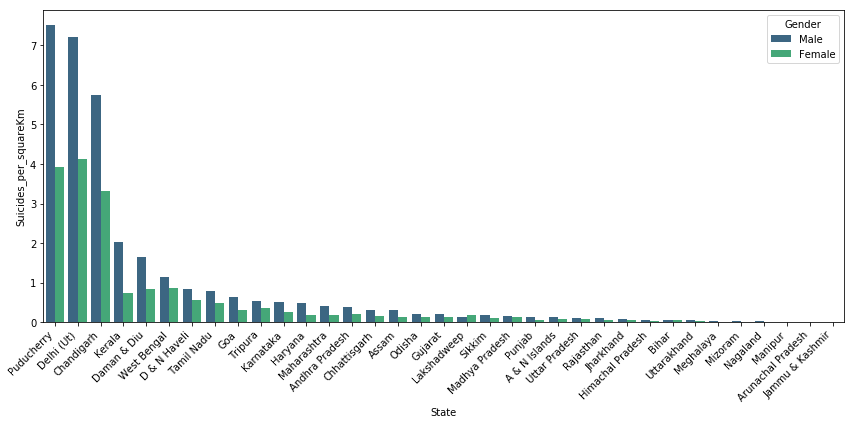

In [11]:
edu = df[df['Type_code']=='Education_Status']
plt.figure(figsize=(12,6))
st = edu.groupby(['State','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
st = st[(st['State']!='Total (States)') & (st['State']!='Total (All India)') & (st['State']!='Total (Uts)')]
# values for areas are taken from wikipedia
statesArea = {'Maharashtra':307713,'West Bengal':88752,'Tamil Nadu':130058,'Andhra Pradesh':275045,'Karnataka':191791,'Kerala':38863,'Madhya Pradesh':308350,'Gujarat':196024,'Chhattisgarh':135191,'Odisha':155707,'Rajasthan':342239,'Uttar Pradesh':243290,'Assam':78438,'Haryana':44212,'Delhi (Ut)':1484,'Jharkhand':79714,'Punjab':50362,'Bihar':94163,'Tripura':10486,'Puducherry':562,'Himachal Pradesh':55673,'Uttarakhand':53483,'Goa':3702,'Jammu & Kashmir':222236,'Sikkim':7096,'A & N Islands':8249,'Arunachal Pradesh':83743,'Meghalaya':22429,'Chandigarh':114,'Mizoram':21081,'D & N Haveli':491,'Manipur':22327,'Nagaland':16579,'Daman & Diu':112,'Lakshadweep':32}
for state in statesArea.keys():
    st.loc[st['State']==state,'Area'] = statesArea[state]
st['Suicides_per_squareKm'] = st['Total']/st['Area']
sortedStates = st.sort_values('Suicides_per_squareKm',ascending=False)
sns.barplot(x='State',y='Suicides_per_squareKm',data=sortedStates,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

#### Union territories whose area is much smaller compared other states have higher number of suicides per square kilometre. Again, Kerala is an exception here as it larger compared all other union territories. Kerala is followed by West Bengal and Tamil Nadu among the Indian states to register higher number of suicides.



    Year   Total
0   2001  108506
1   2002  110417
2   2003  110851
3   2004  113697
4   2005  113914
5   2006  118112
6   2007  122637
7   2008  125017
8   2009  127151
9   2010  134599
10  2011  135585
11  2012  135445


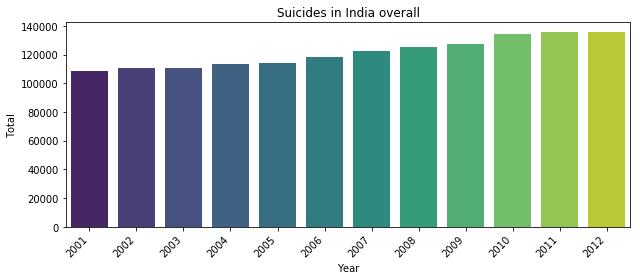

In [12]:
indiaOverall = df[(df['Type_code']=='Education_Status') & (df['State']=='Total (All India)')]
overall = indiaOverall.groupby(['Year'],as_index=False).sum()
print(overall)
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

### The total number of suicides in the conutry are increasing with time. From 2001 to 2012 the percentage increase in suicides is 24.8% which is very scary